In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
pd.set_option('display.max_columns',None) # To display all columns
pd.set_option('display.max_rows',None) # To display all columns
import feather
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [4]:
KT3 = pd.read_feather('KT3.ftr')


In [9]:
qDF = pd.read_csv('questions.csv')

In [6]:
KT3.head()

,timestamp,action_type,item_id,source,user_answer,platform,user_iD
0,2019-08-06 12:55:51.269,enter,b3544,diagnosis,None,mobile,1
1,2019-08-06 12:56:27.972,respond,q5012,diagnosis,b,mobile,1
2,2019-08-06 12:56:34.904,submit,b3544,diagnosis,None,mobile,1
3,2019-08-06 12:56:35.001,enter,b3238,diagnosis,None,mobile,1
4,2019-08-06 12:56:58.682,respond,q4706,diagnosis,c,mobile,1


In [7]:
K3_userid_counts = KT3.user_iD.value_counts()
mask = K3_userid_counts >= 30
KT3_userids = mask[mask].index

K3 = KT3[KT3.user_iD.isin(KT3_userids)]

In [16]:
A = K3.loc[K3['action_type'].isin(['respond'])]
qDF.dropna(axis = 0, how = 'all', inplace = True)
A.dropna(axis = 0, how = 'all', inplace = True)
A.head()

<ipython-input-16-b6b0e1675cd6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A.dropna(axis = 0, how = 'all', inplace = True)


,timestamp,action_type,item_id,source,user_answer,platform,user_iD
1,2019-08-06 12:56:27.972,respond,q5012,diagnosis,b,mobile,1
4,2019-08-06 12:56:58.682,respond,q4706,diagnosis,c,mobile,1
7,2019-08-06 12:58:10.094,respond,q4366,diagnosis,b,mobile,1
10,2019-08-06 12:58:57.361,respond,q4829,diagnosis,a,mobile,1
13,2019-08-06 12:59:55.328,respond,q6528,diagnosis,b,mobile,1


In [18]:
qDF.head()

,question_id,bundle_id,explanation_id,correct_answer,part,tags,deployed_at
0,q1,b1,e1,b,1,1;2;179;181,1558093217098
1,q2,b2,e2,a,1,15;2;182,1558093219720
2,q3,b3,e3,b,1,14;2;179;183,1558093222784
3,q4,b4,e4,b,1,9;2;179;184,1558093225357
4,q5,b5,e5,c,1,8;2;179;181,1558093228439


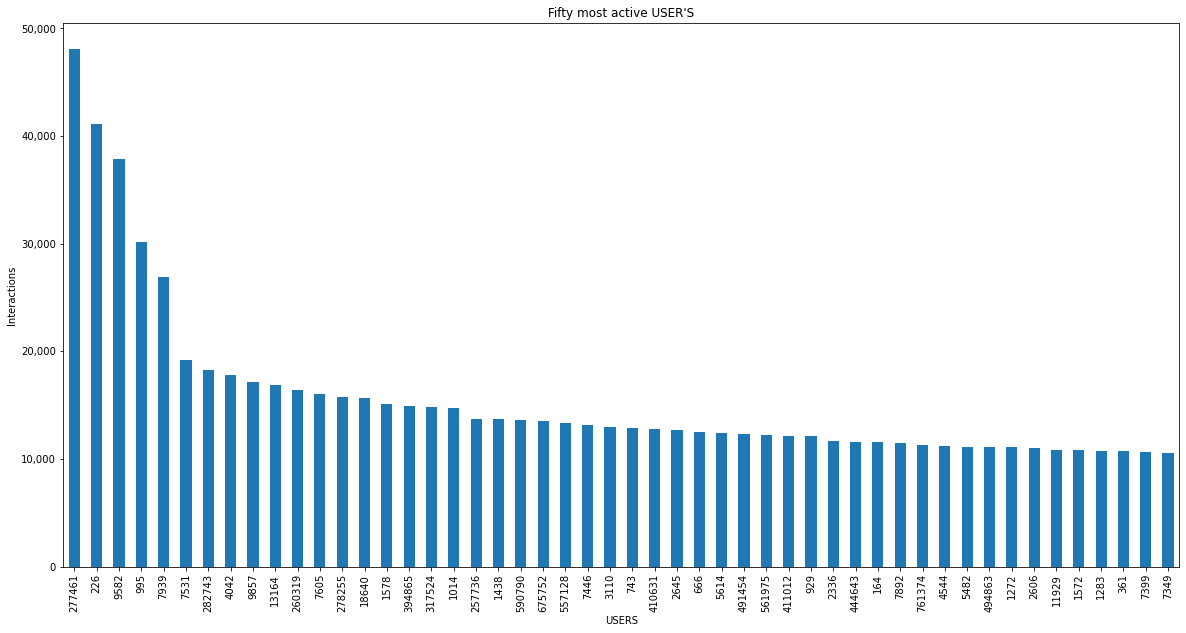

In [17]:
cids = A.user_iD.value_counts()[:50]

fig = plt.figure(figsize=(20,10))
ax = cids.plot.bar()
plt.title("Fifty most active USER'S")
plt.xticks(rotation=90)
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ','))) #add thousands separator
plt.xlabel('USERS')
plt.ylabel('Interactions')
plt.show()


In [15]:
output_dict  = {"user_iD": [], "question_count": [], "correct": [], "incorrect": []}

for u_id in A['user_iD'].unique():
    output_dict['user_iD'].append(u_id)
    original_answer = qDF_row['correct_answer']
    user_answer = A_row['user_answer']
    if user_answer == original_answer:
        output_dict['correct'][output_dict['question_count'].index(question)] += 1
        output_dict['correct'][-1] += 1
    else:
        output_dict['incorrect'][output_dict['question_count'].index(question)] += 1
        output_dict['incorrect'][-1] += 1

        
output = pd.DataFrame(data=output_dict)        

NameError: name 'qDF_row' is not defined

In [20]:
output_dict1 = {"user_iD": [], "question_id": [], "correct": [], "incorrect": []}
output_dict2 = {"user_iD": [], "question_count": [], "correct": [], "incorrect": []}
for u_id in A['user_iD'].unique():
    output_dict2['user_iD'].append(u_id)
    output_dict2['question_count'].append(0)
    output_dict2['correct'].append(0)
    output_dict2['incorrect'].append(0)
    qDF_filtered_by_questions = qDF.loc[qDF["question_id"]==u_id]
    item_counts = A['item_id'].value_counts()
    for _, qDF_row in qDF_filtered_by_questions.iterrows():
        question = qDF_row['question_id']
        rDF_filtered_by_question = A.loc[A["item_id"]==question]
        original_answer = qDF_row['correct_answer']
        output_dict2['question_count'][-1] += 1
        for _, A_row in rDF_filtered_by_question.iterrows():
            user_answer = A_row['user_answer']
            if question not in output_dict1['question_id']:
                output_dict1['user_iD'].append(u_id)
                output_dict1['question_id'].append(question)
                output_dict1['correct'].append(0)
                output_dict1['incorrect'].append(0)
            if user_answer == original_answer:
                output_dict1['correct'][output_dict1['question_id'].index(question)] += 1
                output_dict2['correct'][-1] += 1
            else:
                output_dict1['incorrect'][output_dict1['question_id'].index(question)] += 1
                output_dict2['incorrect'][-1] += 1
        
output1 = pd.DataFrame(data=output_dict1)
output2 = pd.DataFrame(data=output_dict2)

KeyboardInterrupt: 